# Logistic Regression from Scratch


The [logistic model](https://en.wikipedia.org/wiki/Logistic_regression) is a natural candidate when one is interested in a binary outcome. For instance, a researcher might be interested in knowing what makes a successful politician. For the purpose of this blog post, "success"
means the probability of winning an election. In that case, it would be sub-optimal
to use a linear regression model to see what factors are associated with successful
politicians, as the outcome variable is binary (a politician either wins or loses an election).


The linear model is built around the idea that the outcome variable is continuous. What if
the statistician tries to see what factors are influencing the **probability** of
winning? This strategy naturally lends itself to using a [logistic model](https://en.wikipedia.org/wiki/Logistic_regression) (or a [probit](https://en.wikipedia.org/wiki/Probit_model)).
In this blog post, I derive the **logistic model from scratch** and show how one
can estimate its parameters using **gradient descent** or **Newton-Raphson** algorithms. I also use data on NBA players to see what makes a shot successful.

## The logistic model

The outcome variable $y_i$ is either $1$ ("winning") or $0$ ("losing"). The logistic
model makes the assumption that the probability of winning is given by the logistic
function :

$$ f(y_i | x_{i}, \theta_{i}) =  \sigma(x_{i} '\theta)$$

with $\sigma(v) = \frac{exp(v)}{1+exp(v)}$

The probability of losing is 1 minus the probability of wining:

$$ f(y_i | x_{i}, \theta) =  1 - \sigma(x_{i} '\theta)$$

## A latent variable formulation

A powerful way of interpreting the logistic model is to see it as the outcome of latent variable model.
An unobservable latent variable $z_{i}$ depends linearly on $x_{i}$ plus a noise term $\varepsilon_{i}$:

$$ z_{i} = x_{i} '\theta + \varepsilon_{i} $$

We only observe $y_i$, which is equal to 1 when $z_{i}$ is strictly positive, and 0 otherwise. If the error term is distributed according to the [logistic distribution](https://en.wikipedia.org/wiki/Logistic_distribution), we end up with the logistic model described above. If the error term is normally distributed, the model is a [probit model](https://en.wikipedia.org/wiki/Probit_model). To see that, simply express the probability of
the latent variable to be bigger than 0:

$$ f(y_i | x_{i}, \theta_{i}) = P( x_{i} '\theta + \varepsilon_{i} > 0) $$ 
$$  = 1 - P( x_{i} '\theta + \varepsilon_{i} \leq 0) $$ 
$$  = 1 - P(\varepsilon_{i} \leq - x_{i} '\theta ) $$ 
$$  = 1 - P(\varepsilon_{i} \leq - x_{i} '\theta ) $$ 
$$  = \frac{exp(x_{i} '\theta )}{1+exp(x_{i} '\theta )} $$

where the last line comes from using the expression of the [cdf of the logistic distribution](https://en.wikipedia.org/wiki/Logistic_distribution) with zero mean and scale parameter 1.

## Interpretation of coefficients

How can we read the coefficients from a logistic model? The marginal effect of a change in $x_{ij}$ (the $jth$ component of $x_i$) on the probability that $y_i = 1$ is given by:

$$ \frac{\partial f(y_i | x_{i}, \theta)}{\partial x_{ij}} = \sigma(x_{i} '\theta)(1-\sigma(x_{i} '\theta))\theta_j$$ 

A first observation is that the marginal effect depends on $x_i$, unlike in the linear regression model. A second observation is that the first two terms are always positive, so we do have that the interpretation that if $\theta_j$ is positive, an increase in the $jth$ component of $x_i$ leads to a bigger probability of obtaining a success (holding everything else constant).

Another way to read the results from a logistic model is to realize that it implies that the log of odd ratio is linear:

$$ log\Big(\frac{f(y_i | x_{i}, \theta)}{1 - f(y_i | x_{i}, \theta)}\Big) = x_{i} '\theta$$ 

Going back to what makes a politician successful in an election, if the coefficient $\theta_j$ is equal to 0.1, it means that a one unit increase in $x_{ij}$ rises the relative probability of winning an election by approximately $10\%$.

## Log-likelihood function

To predict who is going to win the next elections, one must estimate the value of $\theta$ using the information contained in the sample $(y_i, x_i)_{i=1}^{N}$. One "natural" criterion is to find the value for $\theta$ that **maximizes the probability of observing the
sample**. This procedure is called [Maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation). Let us assume that sample is [i.i.d](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables). If the i.i.d assumption holds, the probability of observing the sample $(y_i, x_i)_{i=1}^{N}$ is the product of the probability of observing each observation. Instead of maximizing the likelihood, it is more convenient to maximize the log-likelihood, which transforms the product of probabilities into a sum:

$$ L((y_i, x_i)_{i=1}^{N};\theta) = log( \prod_{i=1}^{N}f(y_i | x_{i}, \theta)) = \sum_{i=1}^{N} log(f(y_i | x_{i}, \theta_{i}))$$

The probability of observing $y_i$  can compactly be written as

$$ f(y_i | x_{i}, \theta_{i}) = \sigma(x_{i} '\theta)^{y_i}(1 - \sigma(x_{i} '\theta))^{1 - y_i} $$

Hence, the log-likelihood function writes:

$$L((y_i, x_i)_{i=1}^{N};\theta) = \sum_{i=1}^{N} y_i log(\sigma(x_{i} '\theta)) + (1 - y_i)log(1 - \sigma(x_{i} '\theta))$$

## Maximum Likelihood Estimation

Taking the derivative of $f(y_i | x_{i}, \theta)$ with respect to the parameter $\theta$ gives:

$$ f_{\theta}(y_i | x_{i}, \theta) = [y_i - \sigma(x_{i} '\theta)] x_{i} $$

and the derivative of the log-likelihood function with respect to $\theta$ is:

$$L_{\theta}((y_i, x_i)_{i=1}^{N};\theta) = \sum_{i=1}^{N}[y_i - \sigma(x_{i} '\theta)] x_{i}$$


## Gradient descent

To make the link with this [blog post](https://julienpascal.github.io/post/ols_ml/), let us use gradient descent to find the MLE estimate:

$$ \theta_{i+1} = \theta_{i} - \gamma \Big(- L_{\theta}((y_i, x_i)_{i=1}^{N};\theta_{i}) \Big)$$


The [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) algorithm is an iterative procedure to find a minimizer of a function. At each step, the algorithm takes a step of length $\gamma$ towards the direction of steepest descent. Note that I reformulated the problem of finding the maximum of a function $f$ (the log-likelihood) as the problem of finding the minimum of $-f$.

## Newton–Raphson method

Roughly speaking, the Newton-Raphson method is a "smart" gradient descent which uses the information contained in the Hessian of the log-likelihood $HL((y_i, x_i)_{i=1}^{N};\theta_{i})$ (on top of the gradient) to make a right move toward the minimizer. The iterative algorithm proceeds as follows:

$$ \theta_{i+1} = \theta_{i} - (HL((y_i, x_i)_{i=1}^{N};\theta_{i}) )^{-1}  \Big(- L_{\theta}((y_i, x_i)_{i=1}^{N};\theta_{i}) \Big)$$

The next plot shows how the Newton-Raphson method works for a one dimensional root-finding problem:

![Alt Text](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)

source: https://en.wikipedia.org/wiki/Newton%27s_method

Should we use gradient descent or Newton-Raphson? I let the following extract
from the [Wikipedia article](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) on Newton-Raphson speak for itself:

> Where applicable, Newton's method converges much faster towards a local maximum or minimum than gradient descent. In fact, every local minimum has a neighborhood N such that, if we start with x0 ∈ N, Newton's method with step size γ = 1 converges quadratically (if the Hessian is invertible and a Lipschitz continuous function of x in that neighborhood). 

For the logistic model, the Newton-Raphson model is easily applicable because there exists a closed-form formula for the Hessian:

$$ HL((y_i, x_i)_{i=1}^{N};\theta_{i}) = \sum_{i=1}^{N} - \sigma(x_{i} '\theta)[1 - \sigma(x_{i} '\theta)] x_{i} x_{i}'$$


## Implementation in Julia

## I. Working with simulated data

Let's first work with simulated data. Can we actually recover the true parameter values using a manual implementation of the logistic model?

Let's load a few dependencies:

In [18]:
using Distributions
using Plots
pyplot()
using DataFrames
using GLM
using Optim
using CSV
using GLM

Let's create the logistic function:

In [19]:
# Logistic function for a scalar input:
function sigma(x::Float64)
    exp(x)/(1.0 + exp(x))
end

# Logistic function for a vector input:
function sigma(x::Array{Float64,1})
    exp.(x) ./ (1.0 .+ exp.(x))
end

sigma (generic function with 2 methods)

Let's create a function that calculates the likelihood:

In [20]:
function log_likelihood(y::Array{Float64,1}, X::Array{Float64,2}, theta::Array{Float64,1})
    sum = 0.0
    #Loop over individuals in the sample
    for i=1:size(X,1)
        sum += y[i]*log(sigma(transpose(X[i,:])*theta)) + (1.0 - y[i])*log(1.0 - sigma(transpose(X[i,:])*theta))
    end
    return sum
end

log_likelihood (generic function with 1 method)

Let's create a function that returns the derivative of the log-likelihood of the sample, which we need for the gradient descent algorithm:

In [21]:
# Function to calculate the gradient of the log-likelihood of the sample:
function derivative_log_likelihood(y::Array{Float64,1}, X::Array{Float64,2}, theta::Array{Float64,1})
    sum = zeros(size(X,2))
    #Loop over individuals in the sample
    for i=1:size(X,1)
        sum .+= (y[i] - sigma(transpose(X[i,:])*theta))*X[i,:]
    end
    return sum
end

derivative_log_likelihood (generic function with 1 method)

Let's create a function that returns the Hessian of the log-likelihood of the sample, which we need for the Newthon-Raphson algorithm:

In [22]:
# Function to calculate the hessian of the log-likelihood of the sample:
function hessian_log_likelihood(y::Array{Float64,1}, X::Array{Float64,2}, theta::Array{Float64,1})
    hessian = zeros(size(X,2), size(X,2))
    #Loop over individuals in the sample
    for i=1:size(X,1)
        hessian .+= - sigma(transpose(X[i,:])*theta)*(1.0 - sigma(transpose(X[i,:])*theta))*(X[i,:]*transpose(X[i,:]))
    end
    return hessian
end

hessian_log_likelihood (generic function with 1 method)

Let's simulate a sample of individuals:

In [23]:
#Generation of a sample:
#----------------------
N_individuals = 10000 #how many individuals in the sample?
dim_X = 3 #How many dimensions for x
d = Normal(0.0, 1.0)
d_logistic = Logistic(0.0, 1.0)
# Generate true parameter values:
theta0 = [0.0; 1.0; 2.0];

In [24]:
# Generate X:
X = rand(d, N_individuals, dim_X)
# The first column is full one ones (to have a constant)
X[:,1] = ones(N_individuals);

In [25]:
# Convert y to a binary outcome using the latent variabe representation:
proba_success = X*theta0 .+ rand(d_logistic, N_individuals)
y = ifelse.(proba_success .> 0.0, 1.0, 0.0);

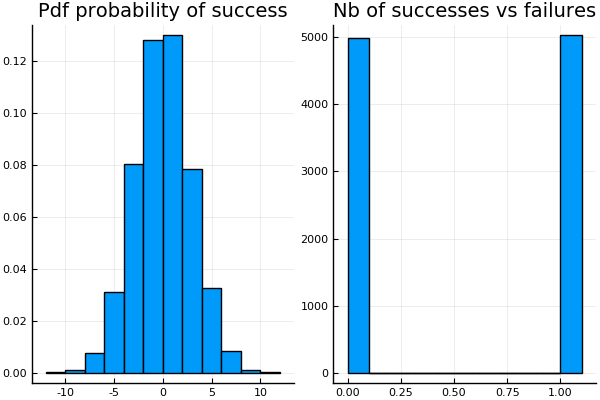

In [26]:
p1 = histogram(proba_success, bins=20, normalize=true, title="Pdf probability of success", legend=false)
p2 = histogram(y, title="Nb of successes vs failures", legend=false)
plot(p1,p2)

### Maximization with Optim

As a first pass, we can maximize the log-likelihood using the package Optim. I use the the [LBFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)
algorithm:

In [27]:
theta_guess = ones(dim_X)
@time res = optimize(theta -> - log_likelihood(y, X, theta), theta_guess, LBFGS())

  0.365351 seconds (3.25 M allocations: 337.831 MiB, 14.42% gc time)


 * Status: failure (objective increased between iterations) (line search failed)

 * Candidate solution
    Minimizer: [-1.21e-02, 1.03e+00, 2.03e+00]
    Minimum:   4.301072e+03

 * Found with
    Algorithm:     L-BFGS
    Initial Point: [1.00e+00, 1.00e+00, 1.00e+00]

 * Convergence measures
    |x - x'|               = 5.95e-08 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.93e-08 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.55e-12 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.06e-15 ≰ 0.0e+00
    |g(x)|                 = 1.80e-06 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    7
    f(x) calls:    22
    ∇f(x) calls:   22


We successfully recover the true parameter values (see `theta0`):

In [28]:
print("Estimate for theta using Optim is $(res.minimizer)")

Estimate for theta using Optim is [-0.0121241, 1.03182, 2.03217]

### Minimization with gradient descent

Let's implement the gradient descent algorithm within a function:

In [29]:
function gradient_descent_probit(y, X , theta_initial::Array{Float64,1}; max_iter::Int64 = 1000, 
                                learning_rate::Float64 = 0.000001, tol::Float64=0.01)
    #initial value for theta:
    theta_old = theta_initial
    theta_new = similar(theta_old)
    #convergence reached?
    success_flag = 0
    #Let's store the convergence history
    history= fill!(zeros(max_iter), NaN)
    for i=1:max_iter 
        theta_new = theta_old + learning_rate*derivative_log_likelihood(y, X, theta_old)
        diff = maximum(abs, theta_new .- theta_old)
        history[i] = diff
        if diff < tol
            success_flag = 1
            break
        end
        theta_old = theta_new
    end
    
    return theta_new, success_flag, history[isnan.(history) .== false]
    
end

gradient_descent_probit (generic function with 1 method)

In [30]:
theta_guess = zeros(dim_X)
@time theta, flag, history = gradient_descent_probit(y, X, theta_guess, max_iter=100000, learning_rate=0.0001, tol=0.00001);

  0.349763 seconds (5.32 M allocations: 557.288 MiB, 22.06% gc time)


The following graph shows the error as a function of the number of iterations. After a few iterations of the gradient descent algorithm, the error is quite small.

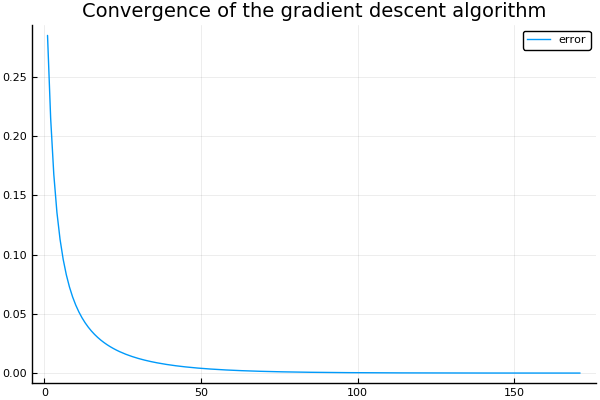

In [31]:
plot(history, label= "error", title = "Convergence of the gradient descent algorithm")

In [32]:
print("Estimate for theta using gradient descent is $(theta)")

Estimate for theta using gradient descent is [-0.0121219, 1.03172, 2.03198]

### Minimization with Newton-Raphson

Let's implement the Newton-Raphson algorithm within a function:

In [33]:
function nr_probit(y, X , theta_initial::Array{Float64,1};
                    max_iter::Int64 = 1000, tol::Float64=0.01)
    #initial value for theta:
    theta_old = theta_initial
    theta_new = similar(theta_old)
    #convergence reached?
    success_flag = 0
    #Let's store the convergence history
    history= fill!(zeros(max_iter), NaN)
    for i=1:max_iter 
        theta_new = theta_old - inv(hessian_log_likelihood(y, X, theta_old))*derivative_log_likelihood(y, X, theta_old)
        diff = maximum(abs, theta_new .- theta_old)
        history[i] = diff
        if diff < tol
            success_flag = 1
            break
        end
        theta_old = theta_new
    end
    
    return theta_new, success_flag, history[isnan.(history) .== false]
    
end

nr_probit (generic function with 1 method)

The following graph shows that we find the minimizer in only 5 steps! The Newton-Raphson algorithm clearly outperforms gradient descent. Of course, everything works well because the
problem is well-behaved and a nice formula for the Hessian is available.

  0.532827 seconds (2.62 M allocations: 160.921 MiB, 8.07% gc time)


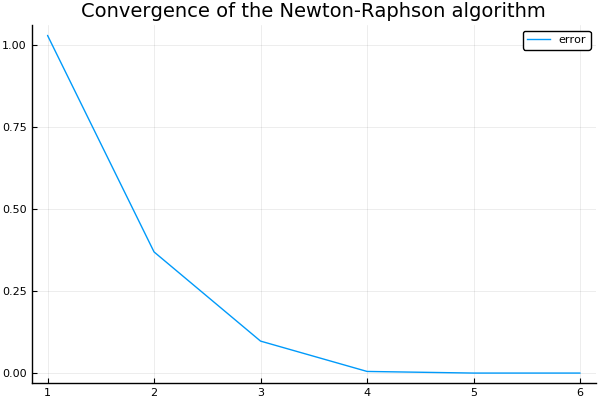

In [34]:
theta_guess = ones(dim_X)
@time theta, flag, history = nr_probit(y, X, theta_guess, max_iter=1000, tol=0.00001);
plot(history, label= "error", title = "Convergence of the Newton-Raphson algorithm")

In [35]:
print("Estimate for theta using Newton-Raphson is $(theta)")

Estimate for theta using Newton-Raphson is [-0.012124, 1.03182, 2.03217]

### Using GLM

We can also use the package [GLM](https://github.com/JuliaStats/GLM.jl) to estimate the logistic model. We first need to put the data into a dataframe. In the `glm()` function, we should use the `LogitLink()`

In [36]:
df = DataFrame(X1=X[:,1],X2=X[:,2], X3=X[:,3], y=y);
first(df,6)

,X1,X2,X3,y
,Float64,Float64,Float64,Float64
1,1.0,-0.375399,-0.388093,0.0
2,1.0,-2.1406,-0.491775,0.0
3,1.0,0.535688,0.0924294,1.0
4,1.0,-1.1767,0.347275,1.0
5,1.0,0.644961,0.794347,0.0
6,1.0,1.1565,0.707322,1.0


In [37]:
fittedmodel = glm(@formula(y ~ X2 + X3), df, Binomial(), LogitLink(), verbose=true);

Iteration: 1, deviance: 8620.302013231514, diff.dev.:301.86766528565204
Iteration: 2, deviance: 8602.238966884226, diff.dev.:18.063046347288036
Iteration: 3, deviance: 8602.144735531361, diff.dev.:0.09423135286488105
Iteration: 4, deviance: 8602.144732577755, diff.dev.:2.953605871880427e-6


In [38]:
print("Estimate for theta using GLM is $(coef(fittedmodel))") 

Estimate for theta using GLM is [-0.012124, 1.03182, 2.03217]

##  II. What makes a successful NBA player?

For an example involving real data, I use the data set on **NBA shots** taken during the 2014-2015 season.
It contains information on: 

* who took the shot
* where on the floor was the shot taken from
* who was the nearest defender, 
* how far away was the nearest defender
* time on the shot clock
* etc. 

The data is available on **Kaggle** [here](https://www.kaggle.com/dansbecker/nba-shot-logs)

In [39]:
df_nba = CSV.read("/home/julien/Documents/REPOSITORIES/LogisticRegression/data/shot_logs.csv");
names(df_nba)

21-element Array{Symbol,1}:
 :GAME_ID                   
 :MATCHUP                   
 :LOCATION                  
 :W                         
 :FINAL_MARGIN              
 :SHOT_NUMBER               
 :PERIOD                    
 :GAME_CLOCK                
 :SHOT_CLOCK                
 :DRIBBLES                  
 :TOUCH_TIME                
 :SHOT_DIST                 
 :PTS_TYPE                  
 :SHOT_RESULT               
 :CLOSEST_DEFENDER          
 :CLOSEST_DEFENDER_PLAYER_ID
 :CLOSE_DEF_DIST            
 :FGM                       
 :PTS                       
 :player_name               
 :player_id                 

The dataset is quite extensive. Let's select whether or not the shot was successful, **the shot clock, the shot distance, and the proximity with the closest defender**:

In [40]:
df_nba = df_nba[[:SHOT_RESULT, :SHOT_CLOCK, :SHOT_DIST, :CLOSE_DEF_DIST]]
# Drop rows with missings:
df_nba = dropmissing(df_nba);
# Drop rows with NaN:
df_nba = df_nba[completecases(df_nba), :]
# Convert SHOT_RESULT to a binary variable (1 for success, 0 for missed)
df_nba[:, :SHOT_RESULT] = ifelse.(df_nba[:, :SHOT_RESULT] .== "made", 1.0, 0.0);
# Show the first few rows of df_nba:
first(df_nba, 4)

,SHOT_RESULT,SHOT_CLOCK,SHOT_DIST,CLOSE_DEF_DIST
,Float64,Float64,Float64,Float64
1,1.0,10.8,7.7,1.3
2,0.0,3.4,28.2,6.1
3,0.0,10.3,17.2,3.4
4,0.0,10.9,3.7,1.1


Let's first use GLM:

In [41]:
fittedmodel = glm(@formula(SHOT_RESULT ~ SHOT_CLOCK + SHOT_DIST + CLOSE_DEF_DIST), df_nba, Binomial(), LogitLink(), verbose=true);
fittedmodel

Iteration: 1, deviance: 162553.8624350455, diff.dev.:135.52181823542924
Iteration: 2, deviance: 162553.81255007617, diff.dev.:0.04988496933947317


StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

SHOT_RESULT ~ 1 + SHOT_CLOCK + SHOT_DIST + CLOSE_DEF_DIST

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                  Estimate   Std. Error    z value  Pr(>|z|)   Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)     -0.0575127  0.0181349     -3.17139    0.0015  -0.0930564  -0.021969 
SHOT_CLOCK       0.0185198  0.00104899    17.6549     <1e-69   0.0164639   0.0205758
SHOT_DIST       -0.059745   0.000858282  -69.61       <1e-99  -0.0614272  -0.0580628
CLOSE_DEF_DIST   0.108392   0.00279232    38.8179     <1e-99   0.102919    0.113865 
────────────────────────────────────────────────────────────────────────────────────

How can we interpret those results?

* time pressure makes one more successful: the higher the shot clock, the more likely one is to score the shot
* shots from further away are more likely to be missed
* the further away the closest defender is, the more likely the shot will be a success

Can we find similar results "manually"? The answer is **yes**. To see that, let's first create the binary variable `y` and put the explanatory variables into `X` and then use Newton-Raphson:

In [42]:
y = convert(Array, df_nba[:SHOT_RESULT]);
X = convert(Matrix, df_nba[[:SHOT_CLOCK, :SHOT_DIST, :CLOSE_DEF_DIST]])
X = hcat(ones(size(X,1)), X);

  0.260955 seconds (4.90 M allocations: 568.272 MiB, 32.53% gc time)


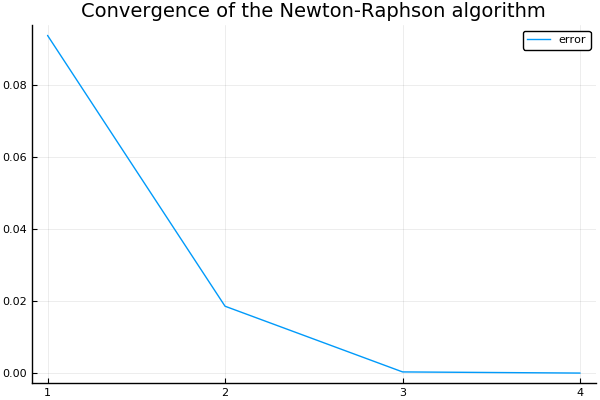

In [43]:
theta_guess = zeros(size(X,2))
@time theta, flag, history = nr_probit(y, X, theta_guess, max_iter=1000, tol=0.0001);
plot(history, label= "error", title = "Convergence of the Newton-Raphson algorithm")

In [44]:
print("Estimate for theta using Optim is $(res.minimizer)")

Estimate for theta using Optim is [-0.0121241, 1.03182, 2.03217]

## Conclusion 

The logistic model, often used in social sciences and in machine learning for classification purposes is a powerful tool. This blog post showed how the logistic regression model can be derived from first principles (latent regression interpretation) and how it can be implemented in just a few lines of codes. A few extensions to this blog post could be to calculate the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) and to calculate the standard errors. 

## References
* https://rpubs.com/junworks/Understanding-Logistic-Regression-from-Scratch 